In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Loading data

In [14]:
lego_col = pd.read_csv('colors.csv')

In [19]:
sets = pd.read_csv('sets.csv')

In [15]:
lego_col

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [16]:
lego_col

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


### Counting unique LEGO colours

In [17]:
lego_col['name'].nunique()

135

### Counting how many colours are transparent and opaque

In [18]:
lego_col['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [20]:
sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


### Finding first ever released set

In [21]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [30]:
sets.loc[sets['year'].idxmin()]

set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

### All models on sale in the 1949

In [37]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


### Looking for five sets with the most parts

In [36]:
most_parts = sets.sort_values('num_parts',ascending=False)[:5]
most_parts

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


### Visualising lego sets dataset

In [114]:
sets_by_values = pd.Series(data=sets['year'].value_counts(ascending=False).sort_index(),\
                           index=np.sort(sets['year'].unique()))
sets_by_values.head()

1949     5
1950     6
1953     4
1954    14
1955    28
Name: year, dtype: int64

Text(0, 0.5, 'Number of Lego sets')

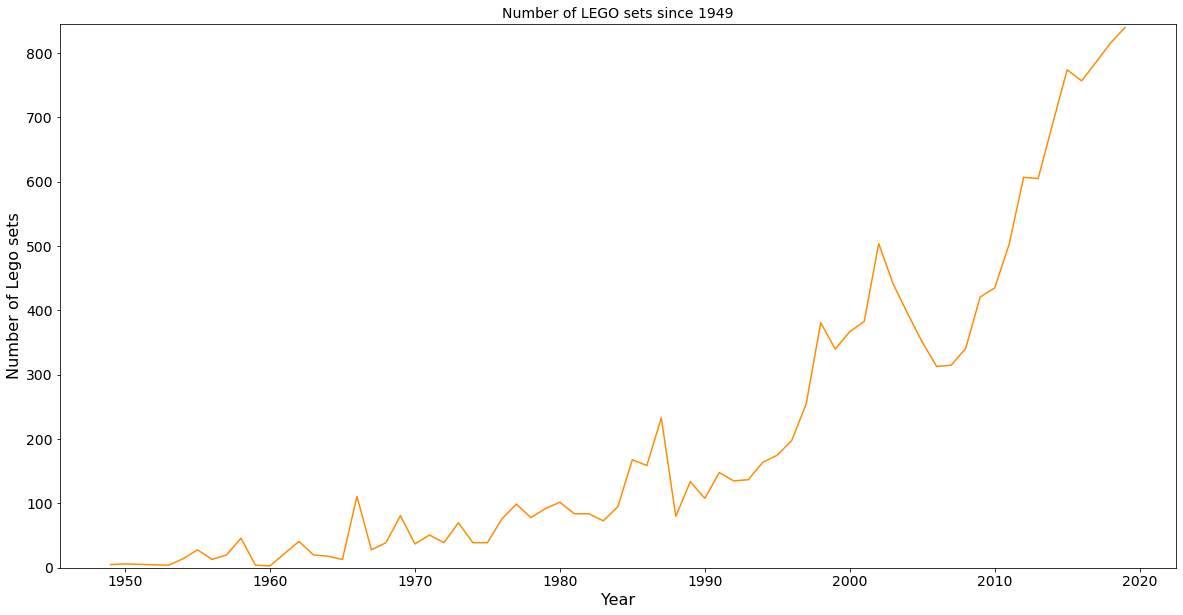

In [129]:
plt.figure(figsize=(20,10))
plt.ylim((0,845))
plt.plot(sets_by_values[:-2], 'darkorange')
plt.title('Number of LEGO sets since 1949', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Lego sets', fontsize=16)

### Using .agg() function 

In [110]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [118]:
themes = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes = themes.rename(columns={'theme_id':'theme_nr'})
themes

,theme_nr
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


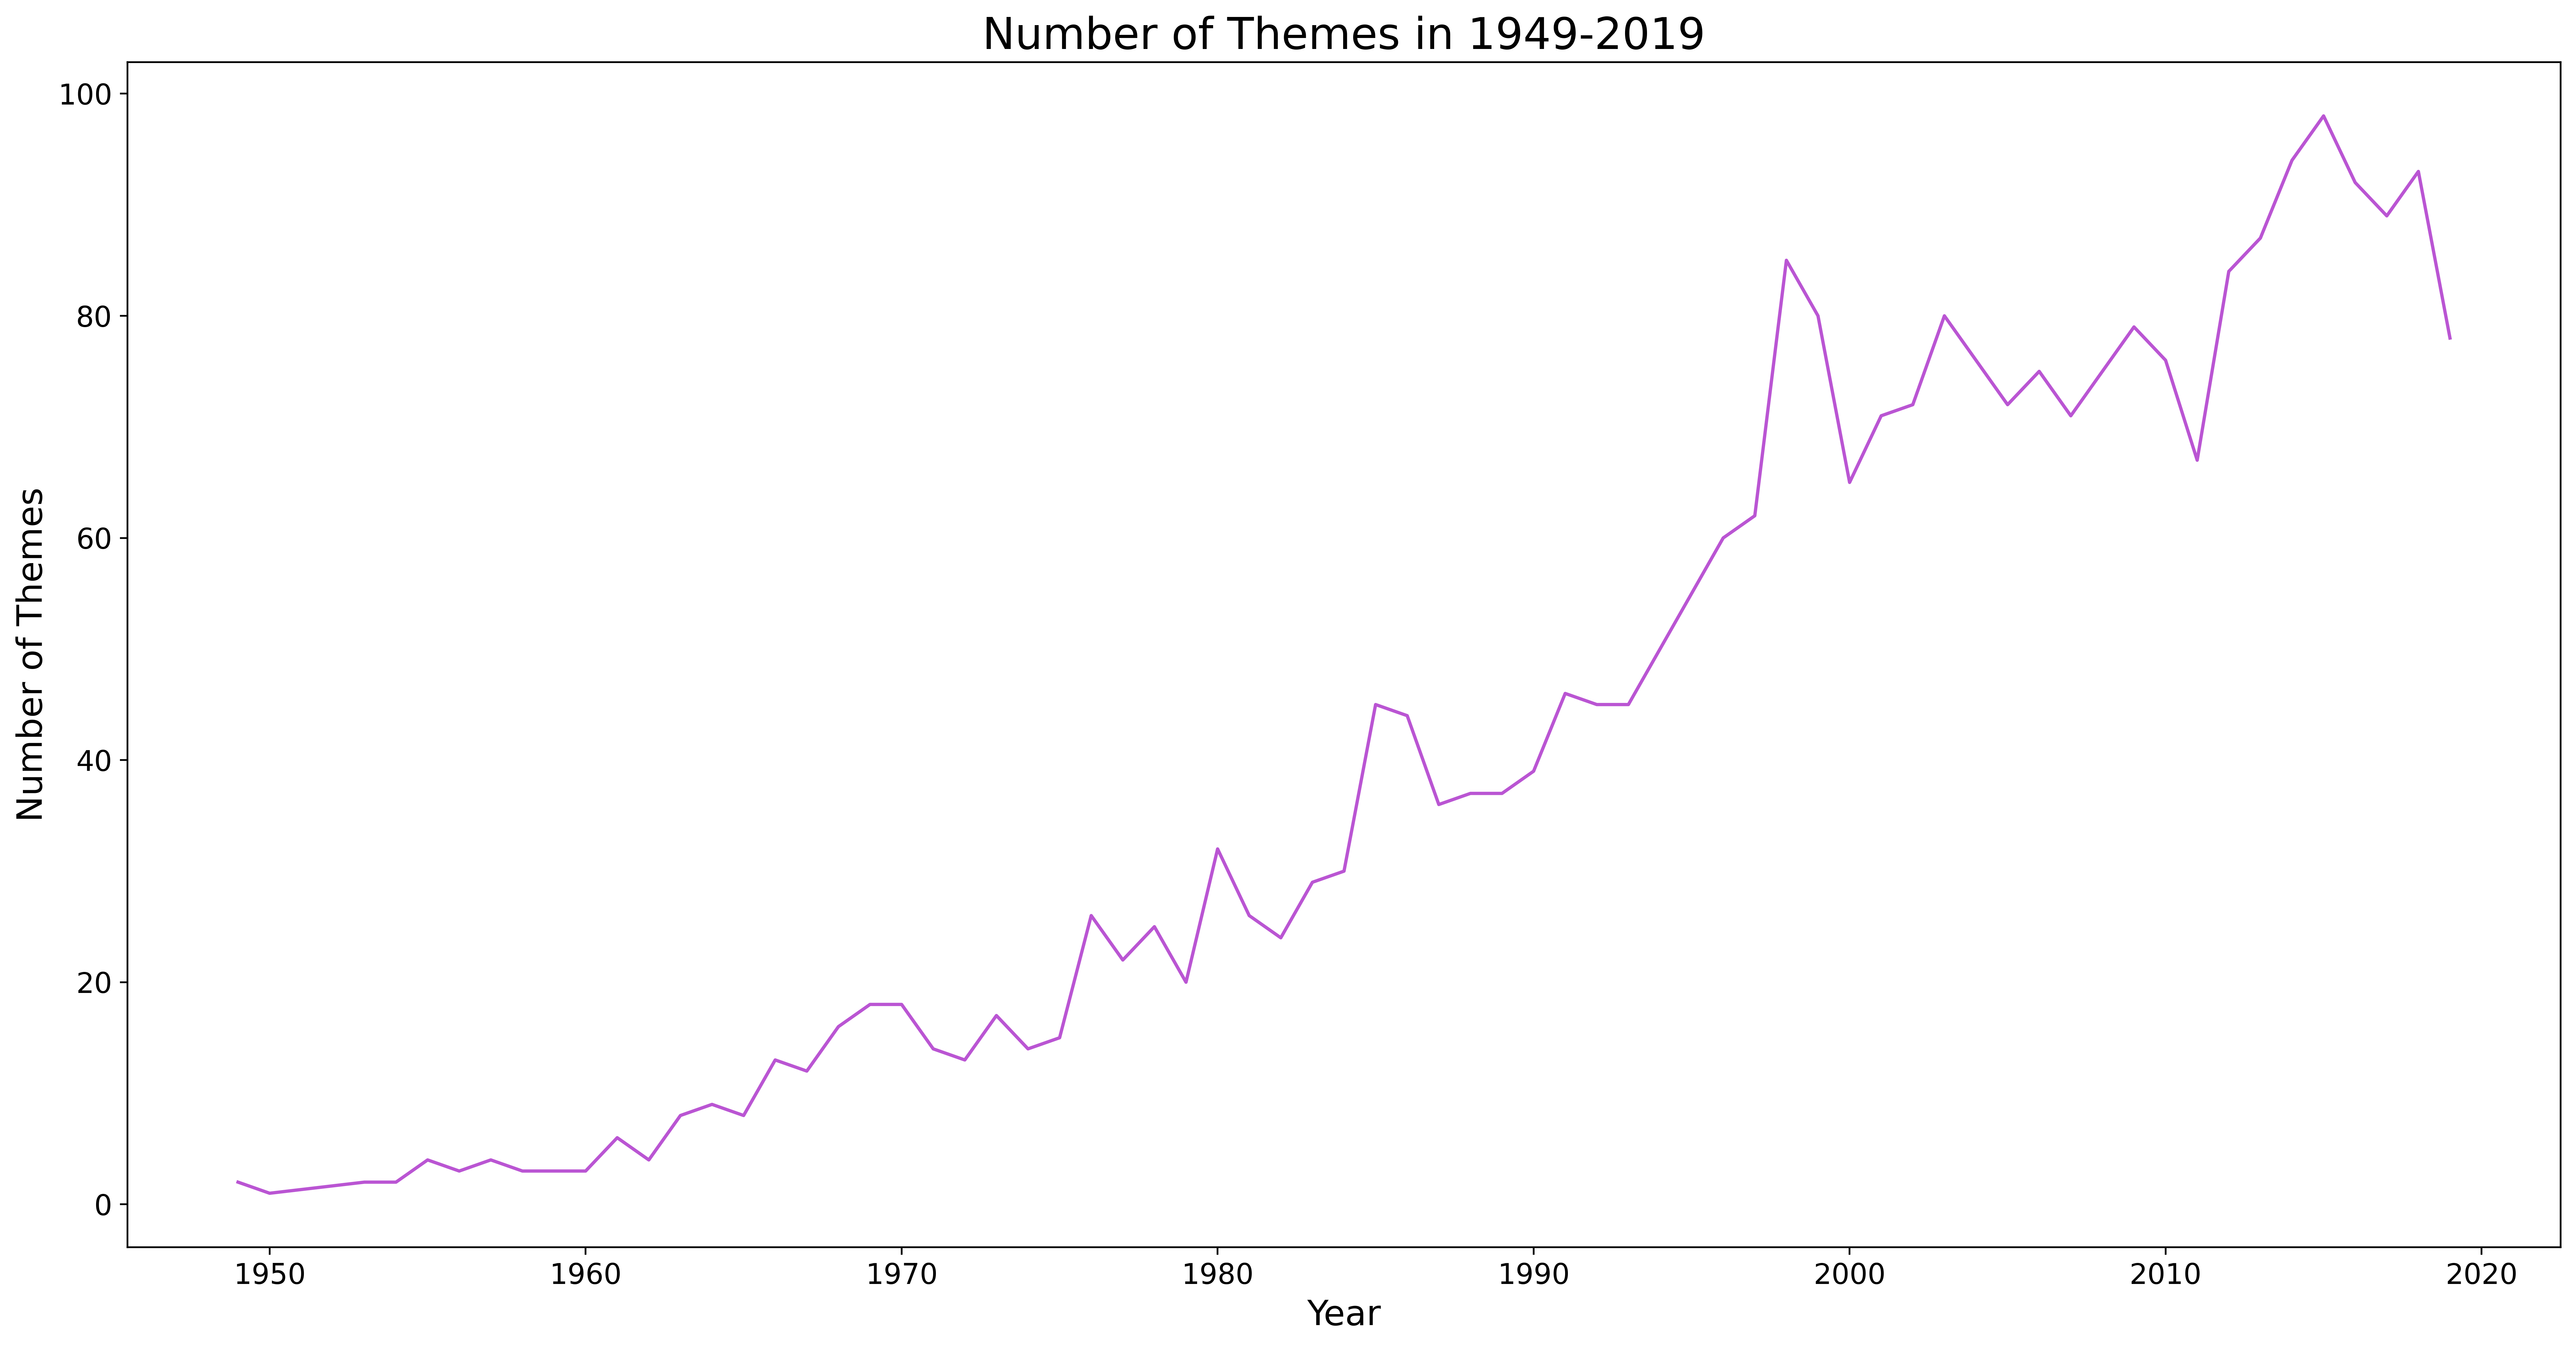

In [128]:
plt.figure(figsize=(20, 10),dpi=500)
plt.ylabel('Number of Themes', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of Themes in 1949-2019', fontsize=20)
plt.plot(themes[:-2],'mediumorchid')

### Merging two plots into one

Text(0, 0.5, 'Number of Themes')

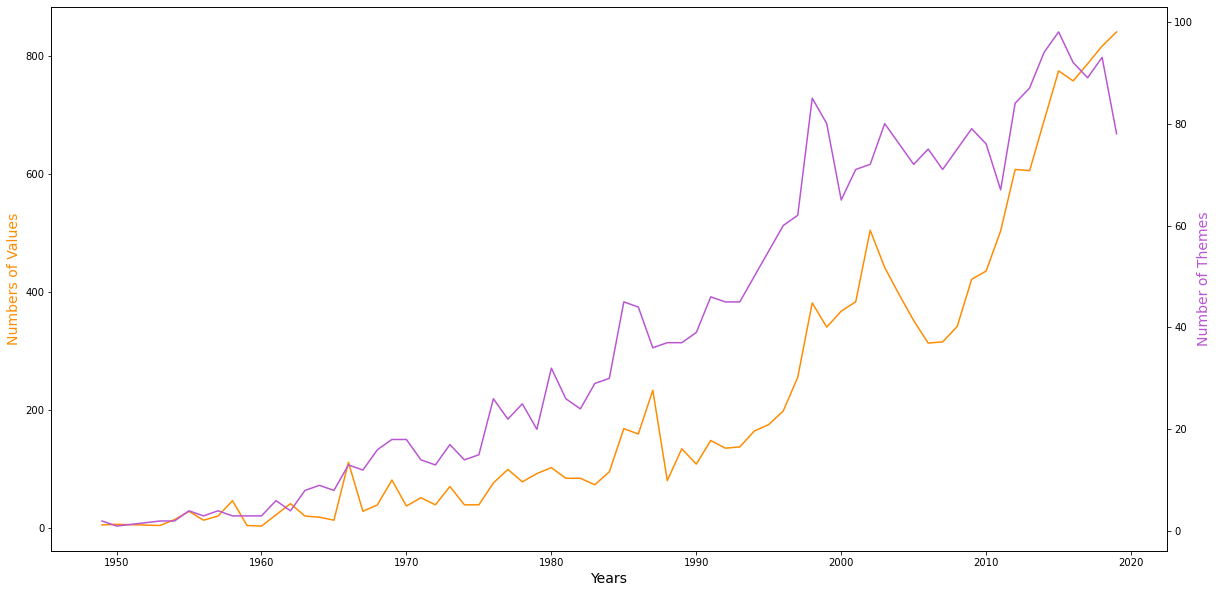

In [147]:
plt.figure(figsize=(20,10))
axis1 = plt.gca()
axis2 = axis1.twinx()

axis1.plot(sets_by_values[:-2], 'darkorange')
axis1.set_xlabel('Years', fontsize=14)
axis1.set_ylabel('Numbers of Values', fontsize=14, color='darkorange')
axis2.plot(themes[:-2],'mediumorchid')
axis2.set_ylabel('Number of Themes', fontsize=14, color='mediumorchid')

In [199]:
parts_per_set = data=sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set = parts_per_set.rename(columns={'num_parts':'Mean Number Of Parts'})
parts_per_set.head()

,Mean Number Of Parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Plotting number of parts per year

In [166]:
import seaborn as sns

<AxesSubplot:xlabel='year'>

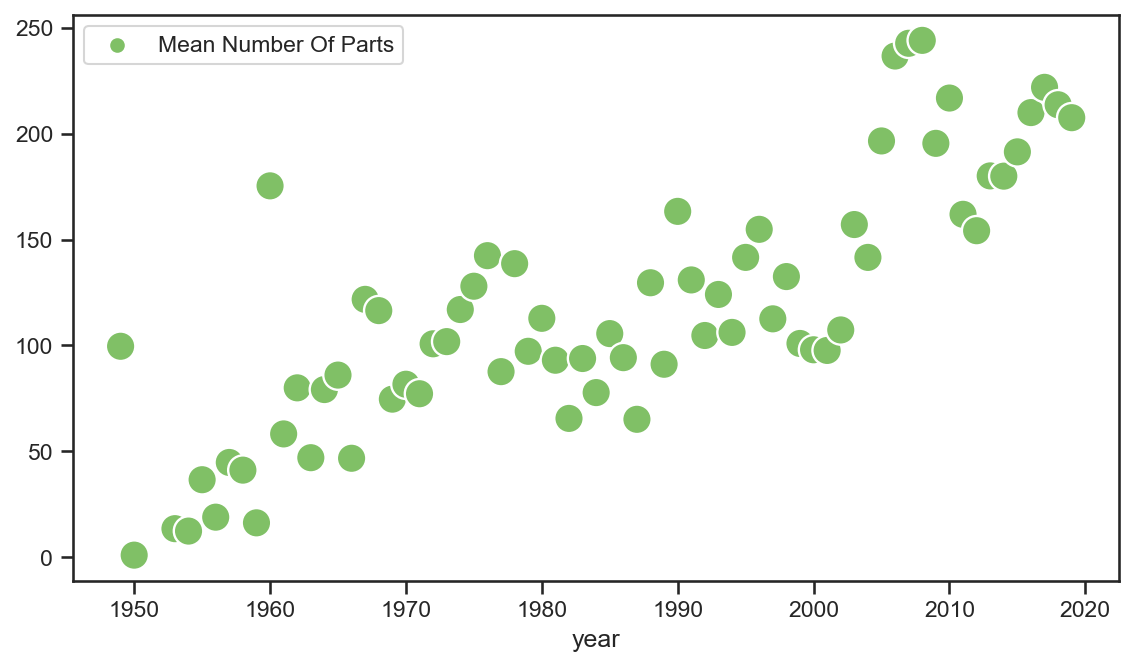

In [206]:
plt.figure(figsize=(9,5), dpi=150)
sns.set_style('ticks')
sns.scatterplot(data=parts_per_set[:-2],s=200,c='green', palette='summer')

### Number of sets per LEGO theme

In [222]:
theme_count = sets['theme_id'].value_counts()
theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [209]:
themes_df = pd.read_csv('themes.csv')

In [211]:
themes_df[themes_df['name']=='Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [212]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [223]:
set_theme_count = pd.DataFrame({'id': theme_count.index, 'set_count':theme_count.values})
set_theme_count.head(10)

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
5,505,328
6,497,310
7,632,299
8,371,273
9,516,248


### Merging two DataFrames

In [224]:
merged = pd.merge(set_theme_count, themes_df, on='id')
merged.tail()

,id,set_count,name,parent_id
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0
570,414,1,Castle,411.0
